# Ford GoBike Data Explanatory(Part 2)
# by Leila Gharoni

## Table of Content
<ul>
    <li><a href="#IN">1. Investigation Overview</a></li>
    <li><a href="#DO">2. Dataset Overview</a></li>
    <li><a href="#KI">3. Key Insight</a></li>
   
</ul>

<a id='IN'></a> 
## Investigation Overview

This investigation analyzes Ford GoBike (bike-sharing system) data. The primary objective is to uncover behavioral and operational trends based on time, user type, gender, and location. These insights aim to support smarter operational planning, enhance user experience, and inform infrastructure improvements.

The analysis is organized into three main focus areas:

####  Time-Related Characteristics

. How long does a typical bike ride last?
Explores trip duration distributions to identify averages, medians, and outliers.

. Average Trip Duration by Day and User Type: 
This analysis explores how ride durations vary across different days of the week and how these patterns differ between Subscribers and Customers. The goal is to understand whether ride lengths are influenced by weekday vs. weekend behavior and how this is shaped by the type of user.

#### User-Related Characteristics

. How does the user type (Customer or Subscriber) affect bike usage?
Compares ride frequency, duration, and patterns across user types to distinguish between commuter and casual behavior.

. Hourly Bike Usage by Gender and Day of Week: 
Analyzes usage peaks by hour of day for each gender, identifying daily patterns and differences between weekdays and weekends.

#### Location-Related Insights

. Top Destinations for Bike Rides: 
Identifies the most frequently used end stations and examines their connection to public transit and business hubs.

. Median Trip Duration by Gender and Top Destination: 
Highlights differences in ride behavior by gender at high-traffic stations to understand infrastructure and equity implications.

<a id='DO'></a> 
## Dataset Overview

This project explores a dataset from the Ford GoBike bike-sharing system, capturing 174,952 individual trips taken between February 1 and March 1, 2019. Each record includes information such as trip duration, start and end times, start and end stations, user type (Customer or Subscriber), and gender. The goal of this investigation is to uncover patterns in bike usage related to time, user demographics, and location, and to provide data-driven insights for improving system efficiency and user experience.

<a id='KI'></a> 
### Key Insights

1. Most rides are short and commute-driven, with 50% lasting between 5 to 13 minutes and peaking during weekday morning and evening rush hours.

2. Subscribers dominate ridership, taking shorter, more frequent trips—especially during commuting hours—while Customers ride less often but for longer durations, particularly on weekends.

3. Thursdays are the busiest day, followed by Tuesday and Wednesday, indicating strong weekday commuter usage. Weekends see fewer but longer rides.

4. The top destination is San Francisco Caltrain Station 2, reflecting its importance as a last-mile connection point to regional transit.

5. Ride behavior varies by gender: female riders tend to have slightly longer trips, while male riders make up the majority of overall rides.

6. Across all genders, weekday riding shows a clear dual-peak pattern (commute times), while weekend rides peak midday, suggesting recreational usage.

7. High-usage stations are clustered around transit and business hubs, confirming the system’s strong role in supporting short, urban mobility.

These findings are supported by a series of visualizations that analyze temporal usage patterns, user demographics, and geographic trends within the system.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("fordgobike-tripdata-clean.csv")

In [4]:
# Cleaning Outliers
quartiles = np.percentile(df['duration_min'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
df1= df.query('(duration_min > @mu - 5 * @sig) & (duration_min < @mu + 5 * @sig)')

In [5]:
df1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_year,start_hr,end_hr,duration_min
count,171317.000000,171317.000000,171317.000000,171317.000000,171317.000000,171317.000000,171317.000000,171317.000000,171317.000000,171317.0,171317.000000,171317.000000,171317.000000
mean,591.042985,138.612712,37.771095,-122.351498,135.960033,37.771286,-122.351031,4478.271567,1984.819358,2019.0,13.447731,13.587928,9.850716
std,373.426333,111.144681,0.100637,0.117917,110.684689,0.100537,0.117450,1661.291088,10.088808,0.0,4.747431,4.755848,6.223772
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,2019.0,0.000000,0.000000,1.016667
25%,319.000000,49.000000,37.770083,-122.411738,44.000000,37.770407,-122.411403,3792.000000,1980.000000,2019.0,9.000000,9.000000,5.316667
50%,502.000000,104.000000,37.780760,-122.398279,100.000000,37.781010,-122.397405,4959.000000,1987.000000,2019.0,14.000000,14.000000,8.366667
75%,766.000000,239.000000,37.797320,-122.283093,233.000000,37.797320,-122.285171,5504.000000,1992.000000,2019.0,17.000000,18.000000,12.766667
max,2234.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,2019.0,23.000000,23.000000,37.233333


In [6]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_day,start_month,start_year,start_hr,end_day,end_month,end_hr,duration_min
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,Thursday,February,2019,23,Friday,March,0,26.416667
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,Thursday,February,2019,23,Friday,March,0,29.883333
5,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Female,No,Thursday,February,2019,23,Friday,March,0,19.116667
6,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Male,No,Thursday,February,2019,23,Friday,March,0,26.916667
7,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Other,No,Thursday,February,2019,23,Friday,March,0,26.166667


## How long does a typical bike ride last?

This histogram illustrates the distribution of bike ride durations in one-minute intervals, revealing that the majority of rides are short and highly concentrated below 20 minutes. The plot includes vertical lines marking key statistical measures:

Mode (green): 4.53 minutes – the most frequent ride duration.

Median (blue): 8.37 minutes – the midpoint of all rides.

Mean (red): 9.85 minutes – pulled slightly higher by longer-duration outliers.

Threshold (purple): 78.5 minutes – used to identify unusually long trips.

The data is right-skewed, with a long tail of less frequent, longer rides. This skew highlights that while the average appears close to 10 minutes, the typical trip is actually shorter, closer to 6–8 minutes. The steep drop-off confirms the system is primarily used for short, utilitarian rides, likely for commuting or local errands.

This visualization supports the insight that most users take quick trips, and long rides are rare—key for fleet optimization, trip forecasting, and designing user-centric policies.


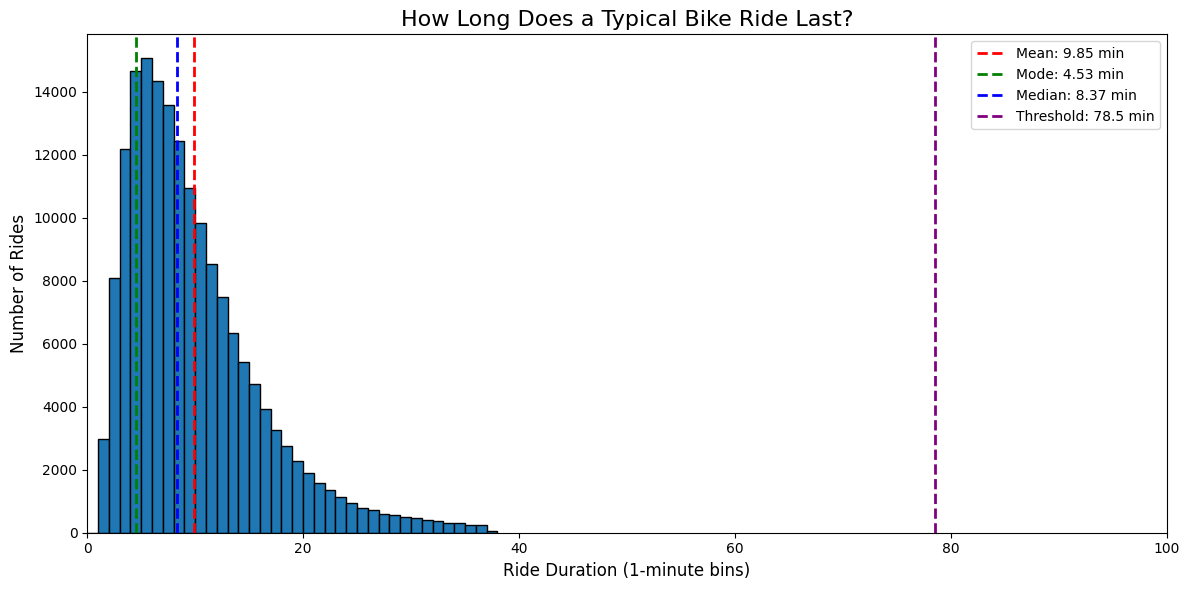

In [7]:
import statistics

# Define the data
graph = df1['duration_min']

# Create 1-minute bins from 0 to the next whole number after the max duration
bins = np.arange(0, int(graph.max()) + 2, 1)

# Set figure size
plt.figure(figsize=(12, 6))

# Plot histogram
plt.hist(graph, bins=bins, edgecolor='black')
plt.xlim(0, 100)

# Axis labels and title
plt.xlabel('Ride Duration (1-minute bins)', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.title('How Long Does a Typical Bike Ride Last?', fontsize=16)

# Add vertical lines for statistical measures
mean_val = statistics.mean(graph)
mode_val = statistics.mode(graph)
median_val = statistics.median(graph)

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f} min')
plt.axvline(mode_val, color='green', linestyle='--', linewidth=2, label=f'Mode: {mode_val:.2f} min')
plt.axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f} min')
plt.axvline(78.5, color='purple', linestyle='--', linewidth=2, label='Threshold: 78.5 min')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

### Average Trip Duration by Day and User Type

This bar plot compares the average trip duration across days of the week, split by user type (Subscriber vs. Customer). It clearly highlights the behavioral difference between user types:

Subscribers maintain a steady and shorter ride duration throughout the week, reflecting their consistent use for commuting or quick transport.

Customers have longer trips overall, with a noticeable increase on weekends, suggesting leisure or recreational usage.

The visualization effectively supports the insight that ride purpose varies by user type and day of the week, helping to inform resource planning and marketing strategies for different user groups.

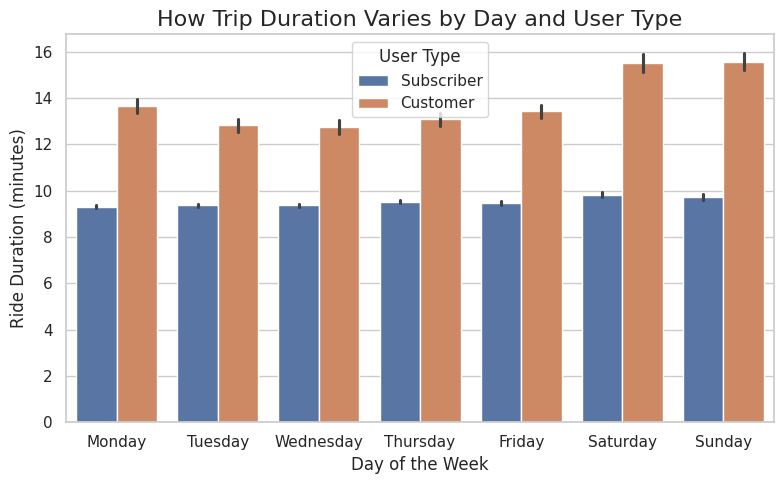

In [10]:
# Set seaborn style
sns.set(style='whitegrid')

plt.figure(figsize=(8, 5))

# Define the weekday order
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)

# Ensure 'start_day' is treated as a categorical variable with the defined order
df1['start_day'] = df1['start_day'].astype(weekdaycat)

# Create the bar plot
sns.barplot(data=df1, x='start_day', y='duration_min', hue='user_type')

# Add labels and title
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Ride Duration (minutes)', fontsize=12)
plt.title("How Trip Duration Varies by Day and User Type", fontsize=16)
plt.legend(title='User Type')

# Display the plot
plt.tight_layout()
plt.show()

## How does the user type (Customer or Subscriber) affect bike usage?

This dual histogram compares ride duration distributions between Subscribers and Customers, revealing clear differences in bike usage patterns based on user type.

Subscribers show a strong peak between 5–10 minutes, with a steep drop-off after that. This distribution suggests frequent, short rides—characteristic of commute-driven behavior.

Customers, on the other hand, have a flatter, more spread-out distribution, indicating fewer but longer rides. This supports the idea that customers are more likely to be casual or recreational users, such as tourists or occasional riders.

The contrast in volume is also notable—subscribers take significantly more rides overall, which reinforces the system’s role as a commuter tool for regular users, while customers represent a smaller, more leisurely segment.

This visualization directly supports one of the core insights: user type significantly impacts both frequency and duration of bike usage, and different strategies should be used to serve each segment effectively.



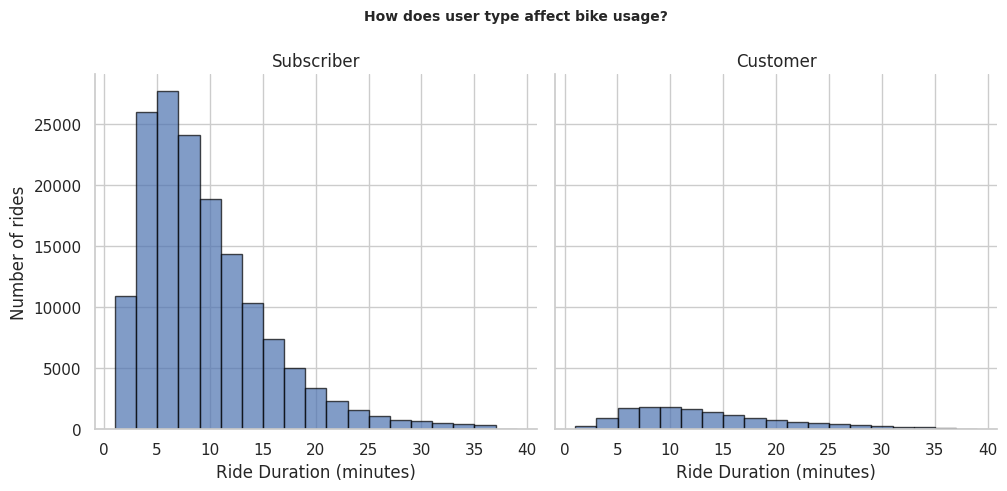

In [11]:
# Set up the FacetGrid for user type comparison
g = sns.FacetGrid(df1, col='user_type', col_wrap=2, height=5, sharex=True, sharey=True)

# Define bin size 
bins = np.arange(df1['duration_min'].min(), df1['duration_min'].max() +2, 2)

# Plot histogram with improved aesthetics
g.map(plt.hist, 'duration_min', bins=bins, edgecolor='black', alpha=0.7)

# Label axes and set subplot titles
g.set_axis_labels('Ride Duration (minutes)', 'Number of rides')
g.set_titles(col_template="{col_name}")

# Adjust layout and add a main title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('How does user type affect bike usage?', fontsize=10, fontweight='bold')

# Show the plot
plt.show()


## Hourly Bike Usage by Gender and Day of Week

This multi-panel histogram shows bike usage by hour of day, segmented by both day of the week (columns) and gender (rows: Male, Female, Other). It captures clear temporal usage patterns across user demographics.

Weekdays (Monday–Friday):
All genders show dual peaks around 8 AM and 5 PM, aligning with standard commute hours.
Male riders dominate in volume, with consistent usage throughout the week.
Female riders follow similar patterns, though with slightly lower counts.

Weekends (Saturday–Sunday):
A shift to a single midday peak (11 AM – 2 PM) across all genders.

Suggests increased recreational or casual use outside of work hours.

Gender Comparison:
Although overall volume is lower for Female and Other users, their behavior mirrors male riders in terms of peak timing.

The “Other” gender group shows minimal usage but still follows a similar trend structure, indicating uniform behavioral rhythms across gender identities.

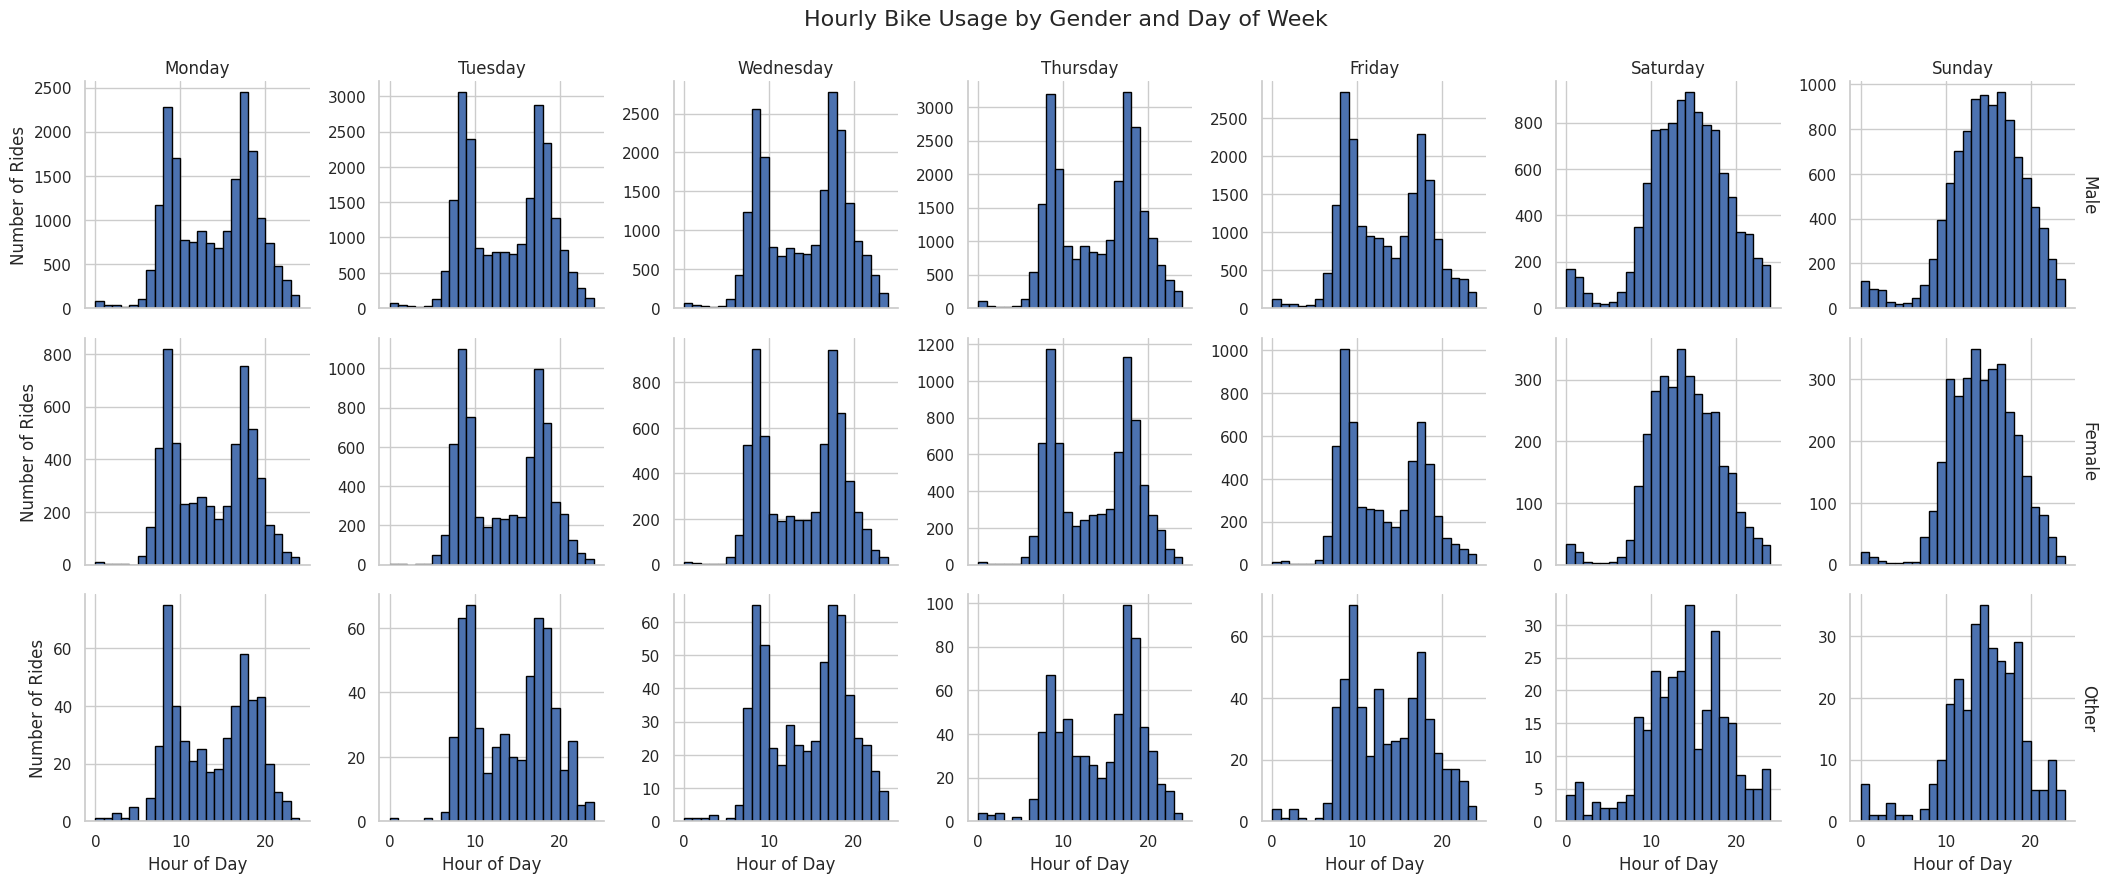

In [13]:
# Define hourly bins (0 to 24)
bins = np.arange(0, 25, 1)

# Create FacetGrid
g = sns.FacetGrid(data=df1, col="start_day", row="member_gender", margin_titles=True, sharey=False, height=3)

# Map histogram
g.map(plt.hist, 'start_hr', bins=bins, edgecolor='black')

# Add axis labels
g.set_axis_labels("Hour of Day", "Number of Rides")

# Add custom titles
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Add a main title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Hourly Bike Usage by Gender and Day of Week", fontsize=16)

plt.show()

###  Top Destinations for Bike Rides

This horizontal bar chart displays the top 5 most common bike ride destinations within the Ford GoBike system, based on the number of trips ending at each station.

San Francisco Caltrain Station 2 (Townsend St at 4th St) stands out as the most frequented destination, reinforcing its role as a critical last-mile connection point for commuters using regional transit.

Other high-traffic destinations include:Market St at 10th St, Montgomery St BART Station (Market St at 2nd St), San Francisco Ferry Building (Harry Bridges Plaza), San Francisco Caltrain (Townsend St at 4th St)

All five are strategically located near public transportation hubs or dense business districts, confirming the bike-share system’s integration into urban mobility.

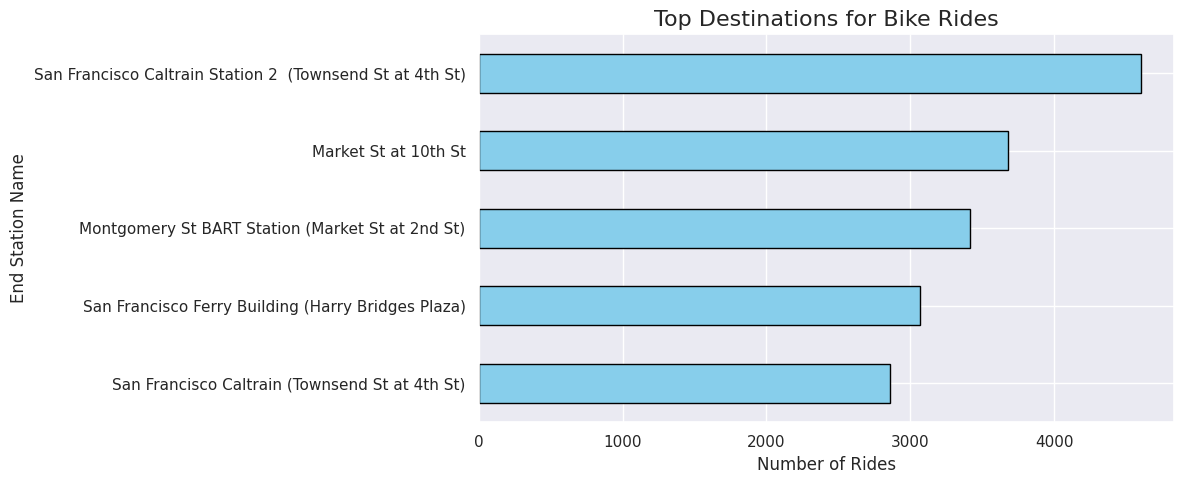

In [16]:
# Get the top 5 most common destination stations
top_dst = df1['end_station_name'].value_counts().nlargest(5).index

# Filter the dataframe to include only trips to those top 5 destinations
top_dst_df = df1[df1['end_station_name'].isin(top_dst)]

# Set plot style and figure size
sns.set_style('darkgrid')
plt.figure(figsize=(12, 5))

# Count and sort the destinations for plotting
top_counts = top_dst_df['end_station_name'].value_counts().sort_values(ascending=True)

# Create the horizontal bar chart
top_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Top Destinations for Bike Rides', fontsize=16)
plt.xlabel('Number of Rides', fontsize=12)
plt.ylabel('End Station Name', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

## Median Trip Duration by Gender and Top Destination

This heatmap presents the median trip duration (in seconds) across the top 5 most common destination stations, segmented by gender. It provides a side-by-side comparison of how ride lengths vary between female, male, and other riders depending on the end station.

Across almost all destinations, female riders tend to have longer median trip durations than male riders.

For example, at Montgomery St BART Station, the median duration for female users is 668 seconds (11.1 minutes), compared to 531.5 seconds (8.9 minutes) for males.

The Ferry Building and Market St also show higher durations for females and other users.

The most balanced distribution appears at San Francisco Caltrain Station 2, but even there, male riders record shorter average durations.

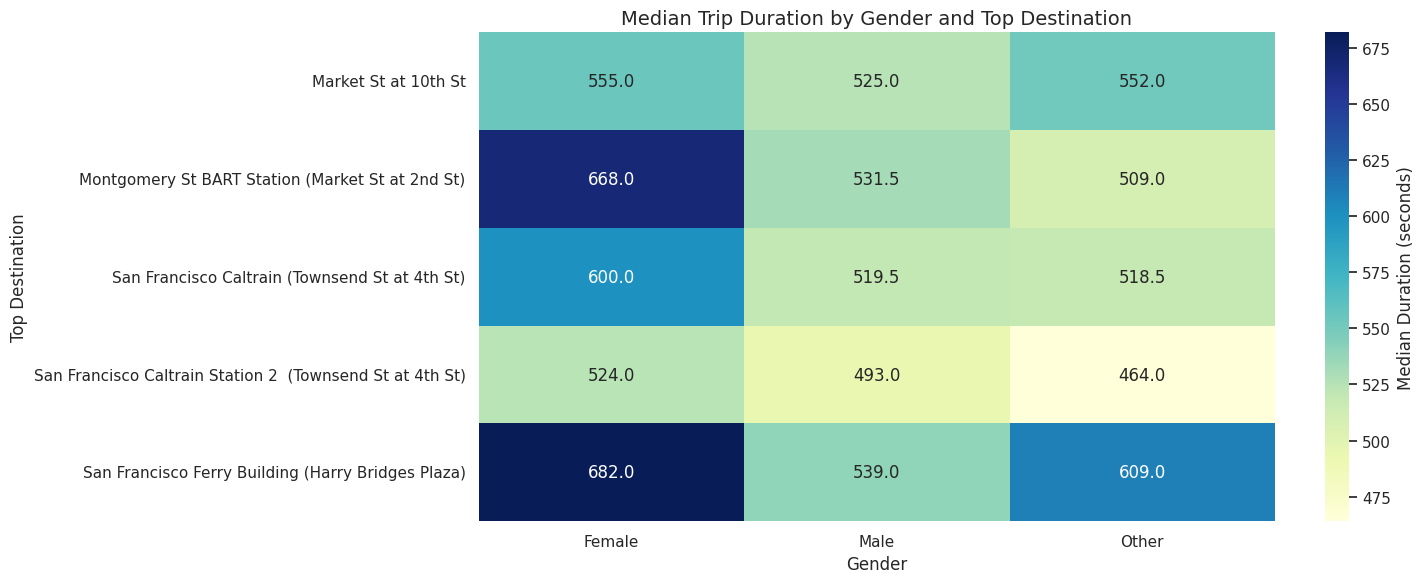

In [17]:
# Set figure size
plt.figure(figsize=(15, 6))

# Group by gender and top destination, then calculate the median duration
cat_means = top_dst_df.groupby(['member_gender', 'end_station_name']).median(numeric_only=True)['duration_sec'].reset_index()

# Pivot the table to create a matrix suitable for a heatmap
cat_means = cat_means.pivot(index='end_station_name', columns='member_gender', values='duration_sec')

# Plot heatmap
sns.heatmap(cat_means, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={"label": "Median Duration (seconds)"})

# Label axes
plt.xlabel("Gender")
plt.ylabel("Top Destination")
plt.title("Median Trip Duration by Gender and Top Destination", fontsize=14)

plt.tight_layout()
plt.show()